In [27]:
import pandas as pd
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import altair as alt

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [21]:
df['loudness']

0         -6.746
1        -17.235
2         -9.734
3        -18.515
4         -9.681
           ...  
113995   -16.393
113996   -18.318
113997   -10.895
113998   -10.889
113999   -10.204
Name: loudness, Length: 114000, dtype: float64

In [22]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [23]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

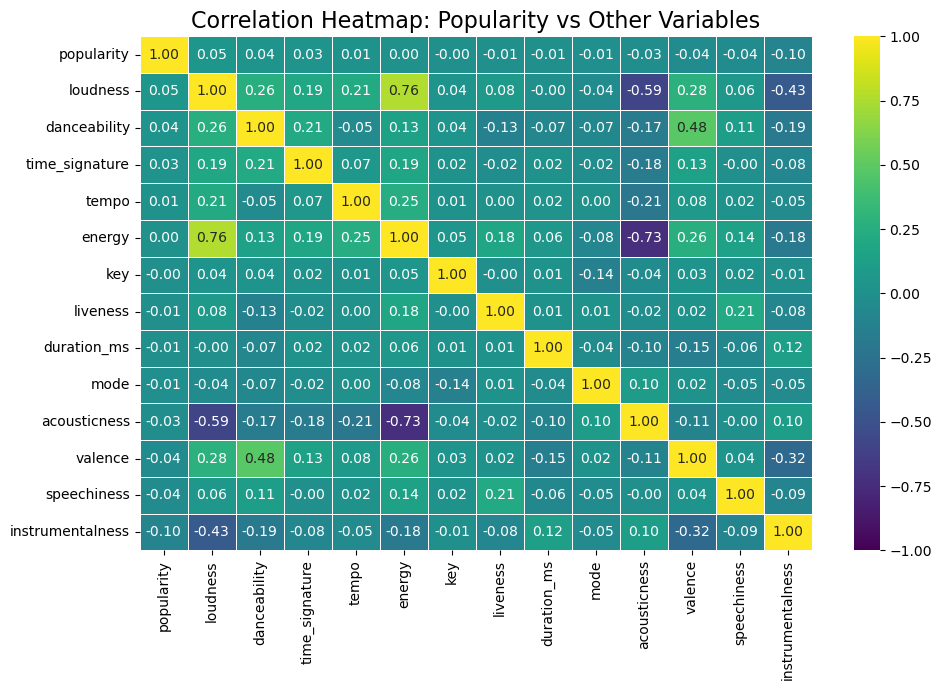

Correlations with Popularity (sorted):
popularity          1.000000
loudness            0.050423
danceability        0.035448
time_signature      0.031073
tempo               0.013205
energy              0.001056
key                -0.003853
liveness           -0.005387
duration_ms        -0.007101
mode               -0.013931
acousticness       -0.025472
valence            -0.040534
speechiness        -0.044927
instrumentalness   -0.095139
Name: popularity, dtype: float64


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named df and already loaded

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a figure with appropriate size
plt.figure(figsize=(10, 7))

# Create the heatmap focusing on correlations with popularity
# We'll sort the columns by their correlation with popularity
popularity_corr = correlation_matrix['popularity'].sort_values(ascending=False)
selected_columns = popularity_corr.index

# Create the heatmap with the sorted columns
heatmap = sns.heatmap(correlation_matrix.loc[selected_columns, selected_columns], 
                      annot=True,          # Show correlation values
                      cmap='viridis',     # Color scheme
                      vmin=-1, vmax=1,     # Range of values
                      fmt='.2f',           # Format of correlation values (2 decimal places)
                      linewidths=0.5)      # Width of grid lines

plt.title('Correlation Heatmap: Popularity vs Other Variables', fontsize=16)
plt.tight_layout()
plt.show()

# If you want to see just correlations with popularity
print("Correlations with Popularity (sorted):")
print(popularity_corr)

In [30]:
# Group by genre and calculate mean danceability
genre_b = df.groupby('track_genre')['danceability'].mean().reset_index()

# Sort in descending order by danceability
genre_danceability = genre_b.sort_values('danceability', ascending=False)

# Get the top 3 genres with highest danceability
top_3_danceable_genres = genre_danceability.head(3)

print("Top 3 genres with highest danceability:")
print(top_3_danceable_genres)

# If you just want the genre names as a list
top_3_genre_names = top_3_loud_genres['track_genre'].tolist()
print("\nTop 3 genre names:", top_3_genre_names)

Top 3 genres with highest danceability:
      track_genre  danceability
66           kids      0.778906
13  chicago-house      0.766176
89      reggaeton      0.758521

Top 3 genre names: ['kids', 'chicago-house', 'reggaeton']


In [32]:
# Filter the original dataframe to only include songs from the top 3 genres
filtered_df = df[df['track_genre'].isin(top_3_genre_names)].copy()

# Create a selection that we'll use to link the charts
genre_selection = alt.selection_point(fields=['track_genre'], on='click')

# Create the bar chart of genres by average danceability
bar_chart = alt.Chart(top_3_danceable_genres).mark_bar().encode(
    x=alt.X('track_genre:N', title='Genre', sort='-y'),
    y=alt.Y('danceability:Q', title='Average Danceability'),
    color=alt.condition(
        genre_selection,
        alt.Color('track_genre:N', scale=alt.Scale(scheme='viridis'), legend=None),
        alt.value('lightgray')
    ),
    tooltip=['track_genre:N', 'danceability:Q']
).properties(
    width=400,
    height=300,
    title='Top 3 Genres by Danceability'
).add_selection(
    genre_selection
)

# Create a scatter plot that will be filtered by the selection
scatter_plot = alt.Chart(filtered_df).mark_circle(size=60, opacity=0.7).encode(
    x=alt.X('danceability:Q', title='Danceability'),
    y=alt.Y('popularity:Q', title='Popularity'),
    color=alt.Color('track_genre:N', scale=alt.Scale(scheme='viridis')),
    tooltip=['track_name:N', 'artists:N', 'danceability:Q', 'popularity:Q']
).properties(
    width=500,
    height=400,
    title='Danceability vs Popularity by Track'
).transform_filter(
    genre_selection
)

# Add track name text for the most popular tracks
text = alt.Chart(filtered_df).mark_text(align='left', dx=7, dy=-7, fontSize=10).encode(
    x='danceability:Q',
    y='popularity:Q',
    text='track_name:N',
    opacity=alt.value(0)).transform_filter(
    genre_selection
)

# Combine scatter plot with text
detailed_scatter = scatter_plot + text

# Create the final visualization with both charts
final_viz = alt.vconcat(
    bar_chart,
    detailed_scatter
).resolve_scale(
    color='shared'
)

# Display the visualization
final_viz

/var/folders/0y/0zpykhl5035f2h_kd9s4ttgr0000gn/T/ipykernel_7697/1181913883.py:21: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.VConcatChart(...)

In [34]:
final_viz.save('music_genre_visualization.html')

In [52]:
# Get the top 3 most popular genres
genres_by_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
top_3_genres = genres_by_popularity.index[:3].tolist()

# Get all other genres for dropdown
other_genres = genres_by_popularity.index[3:].tolist()

In [54]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set a default genre as the starting point
default_genre = "sad"  # Set this to whichever genre you'd like as the default

# Create figure with 4 subplots - REMOVE subplot_titles here
fig = make_subplots(rows=1, cols=4)  # Removed the subplot_titles parameter

# Add the initial traces (for top 3 genres and the default genre)
for i, genre in enumerate(top_3_genres + [default_genre]):
    genre_data = df[df['track_genre'] == genre]['popularity']
    
    fig.add_trace(
        go.Violin(
            y=genre_data,
            name=genre,
            box_visible=True,
            meanline_visible=True,
            fillcolor='rgba(128, 0, 128, 0.5)',
            line_color='purple',
            marker_color='purple',
            points='outliers'
        ),
        row=1, col=i+1
    )

# Create frames for each genre option
frames = []
for genre in other_genres:
    genre_data = df[df['track_genre'] == genre]['popularity']
    
    # Create a frame that updates the 4th subplot
    frame = go.Frame(
        name=genre,
        data=[
            # Keep the first 3 traces unchanged
            go.Violin(
                y=df[df['track_genre'] == top_3_genres[0]]['popularity'],
                name=top_3_genres[0],
                box_visible=True,
                meanline_visible=True,
                fillcolor='rgba(128, 0, 128, 0.5)',
                line_color='purple',
                marker_color='purple',
                points='outliers'
            ),
            go.Violin(
                y=df[df['track_genre'] == top_3_genres[1]]['popularity'],
                name=top_3_genres[1],
                box_visible=True,
                meanline_visible=True,
                fillcolor='rgba(128, 0, 128, 0.5)',
                line_color='purple',
                marker_color='purple',
                points='outliers'
            ),
            go.Violin(
                y=df[df['track_genre'] == top_3_genres[2]]['popularity'],
                name=top_3_genres[2],
                box_visible=True,
                meanline_visible=True,
                fillcolor='rgba(128, 0, 128, 0.5)',
                line_color='purple',
                marker_color='purple',
                points='outliers'
            ),
            # Update the 4th trace with the selected genre
            go.Violin(
                y=genre_data,
                name=genre,
                box_visible=True,
                meanline_visible=True,
                fillcolor='rgba(128, 0, 128, 0.5)',
                line_color='purple',
                marker_color='purple',
                points='outliers'
            )
        ],
        # REMOVE the annotations from the frame layout that would add titles
        layout=go.Layout(
            title_text="Popularity Distribution by Genre"
            # Removed the annotations that were adding subplot titles
        )
    )
    frames.append(frame)

# Add frames to the figure
fig.frames = frames

# Add dropdown (using `updatemenus`)
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            active=0,
            buttons=[
                dict(
                    label=genre,
                    method="animate",
                    args=[
                        [genre],
                        {
                            "frame": {"duration": 300, "redraw": True},
                            "mode": "immediate",
                            "transition": {"duration": 3000}
                        }
                    ]
                ) for genre in other_genres
            ],
            x=0.13,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ],
    annotations=[
        dict(text="Select a 4th genre:", x=0.01, xref="paper", y=1.15, yref="paper", 
             showarrow=False, font=dict(size=14))
    ],
    height=600,
    title={
        'text': "Popularity Distribution by Genre",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#333333'}
    },
    plot_bgcolor='#f0f0f0',
    margin=dict(l=40, r=40, t=120, b=40)
)

# Update y-axis for all subplots
for i in range(1, 5):
    fig.update_yaxes(title_text="Popularity" if i == 1 else None, range=[0, 100], row=1, col=i)

# Save to HTML (interactive)
fig.write_html("music_genre_violin_plot.html", include_plotlyjs=True, full_html=True)